### ARMA

In [2]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### ARMA(1,0) = AR(1)

In [3]:
# setting
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([])
index_name = ['const', 'ar(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

In [4]:
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample = 1000, burnin = 500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend = 'c', disp = 0)

C:\Users\sjyt1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


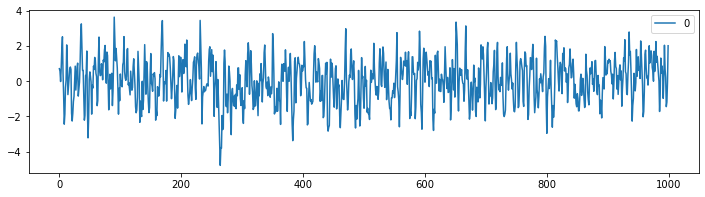

<ipython-input-24-7cf4008cd02b>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  statsmodels.graphics.tsaplots.plot_pacf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())


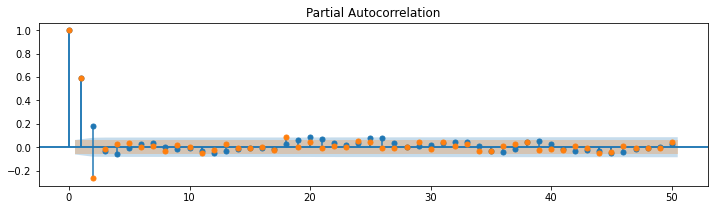

In [24]:
pd.DataFrame(y).plot(figsize = (12, 3))
plt.show()

plt.figure(figsize = (12, 3))
statsmodels.graphics.tsaplots.plot_acf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
statsmodels.graphics.tsaplots.plot_pacf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
plt.show()

In [8]:
fit.forecast(steps = 5)

(array([1.31642615, 0.99420828, 0.75336633, 0.57334886, 0.43879469]),
 array([0.95879083, 1.19702355, 1.31141015, 1.37116739, 1.4034453 ]),
 array([[-0.56276935,  3.19562165],
        [-1.35191476,  3.34033132],
        [-1.81695033,  3.32368299],
        [-2.11408984,  3.26078755],
        [-2.31190755,  3.18949693]]))

In [9]:
pred_ts_point = fit.forecast(steps = ahead)[0]
pred_ts_interval = fit.forecast(steps = ahead)[2]

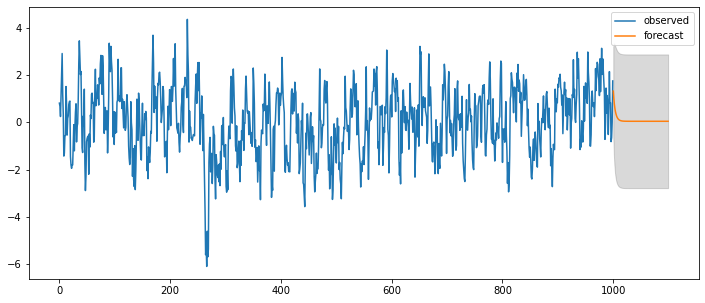

In [12]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index = forecast_index).plot(label = 'forecast', ax = ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,1], color = 'k', alpha = 0.15)
plt.legend(['observed', 'forecast'])

In [13]:
display(fit.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2775.2536
Dependent Variable: y                Log-Likelihood:      -1377.3  
Date:               2021-07-23 10:26 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           2                Sample:              0        
Df Residuals:       998                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     4.0000           HQIC:                2766.126 
AIC:                2760.5304                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         0.0406     0.1197    0.3389   0.7347   -0.1940   0.2752
ar.L1.y       0.7475     0.0210   35.6193   0.0000    0.7063   0.7886
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.3379             0.0000           1.3379             0.0000
===================================================================

"""

#### ARMA(2,0) = AR(2)

In [14]:
# setting
np.random.seed(123)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([])
index_name = ['const', 'ar(1)', 'ar(2)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

In [15]:
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample = 1000, burnin = 500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend = 'c', disp = 0)

C:\Users\sjyt1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
pd.DataFrame(y).plot(figsize = (12, 3))
plt.show()

plt.figure(figsize = (12, 3))
statsmodels.graphics.tsaplots.plot_acf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
statsmodels.graphics.tsaplots.plot_pacf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
plt.show()

In [25]:
pred_ts_point = fit.forecast(steps = ahead)[0]
pred_ts_interval = fit.forecast(steps = ahead)[2]

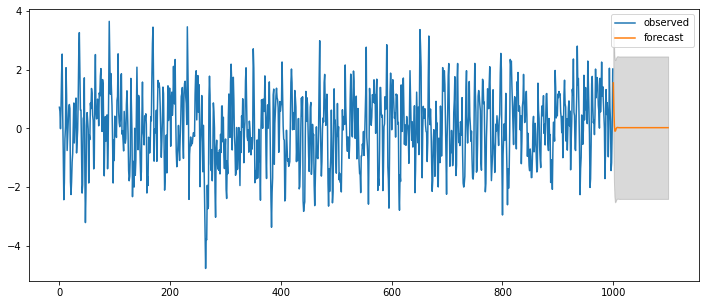

In [26]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index = forecast_index).plot(label = 'forecast', ax = ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,1], color = 'k', alpha = 0.15)
plt.legend(['observed', 'forecast'])

In [27]:
display(fit.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2781.5944
Dependent Variable: y                Log-Likelihood:      -1377.0  
Date:               2021-07-23 10:32 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       997                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     5.0000           HQIC:                2769.424 
AIC:                2761.9633                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        0.0193     0.0592    0.3255   0.7448   -0.0967    0.1352
ar.L1.y      0.7557     0.0305   24.7647   0.0000    0.6959    0.8155
ar.L2.y     -0.2678     0.0305   -8.7791   0.0000   -0.3276   -0.2080
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.4111            -1.3203           1.9324            -0.1197
AR.2           1.4111             1.3203           1.9324             0.1197
===================================================================

"""

#### ARMA(0,1) = MA(1)

In [28]:
# setting
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65])
index_name = ['const', 'ma(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

In [29]:
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample = 1000, burnin = 500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend = 'c', disp = 0)

C:\Users\sjyt1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
plt.show()

plt.figure(figsize = (12, 3))
statsmodels.graphics.tsaplots.plot_acf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
statsmodels.graphics.tsaplots.plot_pacf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
plt.show()

In [30]:
pred_ts_point = fit.forecast(steps = ahead)[0]
pred_ts_interval = fit.forecast(steps = ahead)[2]

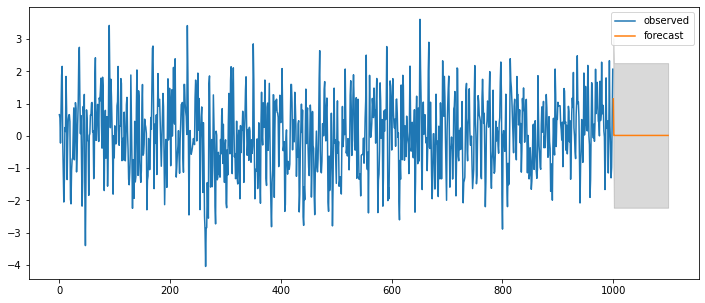

In [31]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index = forecast_index).plot(label = 'forecast', ax = ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,1], color = 'k', alpha = 0.15)
plt.legend(['observed', 'forecast'])

In [32]:
display(fit.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2775.2511
Dependent Variable: y                Log-Likelihood:      -1377.3  
Date:               2021-07-23 10:37 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           2                Sample:              0        
Df Residuals:       998                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     4.0000           HQIC:                2766.124 
AIC:                2760.5278                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         0.0157     0.0500    0.3146   0.7531   -0.0823   0.1138
ma.L1.y       0.6508     0.0246   26.5050   0.0000    0.6027   0.6989
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
MA.1          -1.5365             0.0000           1.5365             0.5000
===================================================================

"""

#### ARMA(0,2) = MA(2)

In [33]:
# setting
np.random.seed(123)
ar_params = np.array([])
ma_params = np.array([0.65, -0.25])
index_name = ['const', 'ma(1)', 'ma(2)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

In [34]:
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample = 1000, burnin = 500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend = 'c', disp = 0)

C:\Users\sjyt1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
plt.show()

plt.figure(figsize = (12, 3))
statsmodels.graphics.tsaplots.plot_acf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
statsmodels.graphics.tsaplots.plot_pacf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
plt.show()

In [35]:
pred_ts_point = fit.forecast(steps = ahead)[0]
pred_ts_interval = fit.forecast(steps = ahead)[2]

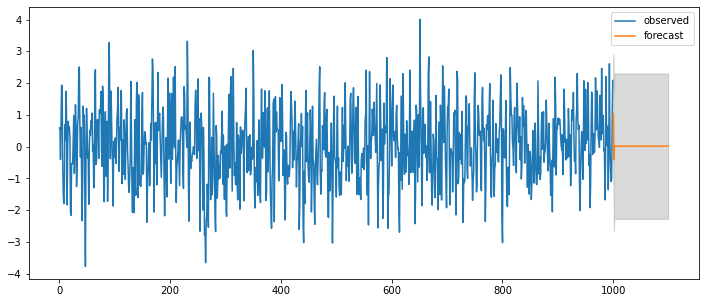

In [36]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index = forecast_index).plot(label = 'forecast', ax = ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,1], color = 'k', alpha = 0.15)
plt.legend(['observed', 'forecast'])

In [37]:
display(fit.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2783.1398
Dependent Variable: y                Log-Likelihood:      -1377.8  
Date:               2021-07-23 10:39 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       997                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     8.0000           HQIC:                2770.970 
AIC:                2763.5088                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        0.0130     0.0425    0.3053   0.7602   -0.0703    0.0962
ma.L1.y      0.6501     0.0310   20.9416   0.0000    0.5892    0.7109
ma.L2.y     -0.2487     0.0307   -8.0906   0.0000   -0.3090   -0.1885
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
MA.1          -1.0865             0.0000           1.0865             0.5000
MA.2           3.7001             0.0000           3.7001             0.0000
===================================================================

"""

#### ARMA(1,1)

In [38]:
# setting
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([0.65])
index_name = ['const', 'ar(1)', 'ma(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

In [39]:
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample = 1000, burnin = 500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend = 'c', disp = 0)

C:\Users\sjyt1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
plt.show()

plt.figure(figsize = (12, 3))
statsmodels.graphics.tsaplots.plot_acf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
statsmodels.graphics.tsaplots.plot_pacf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
plt.show()

In [40]:
pred_ts_point = fit.forecast(steps = ahead)[0]
pred_ts_interval = fit.forecast(steps = ahead)[2]

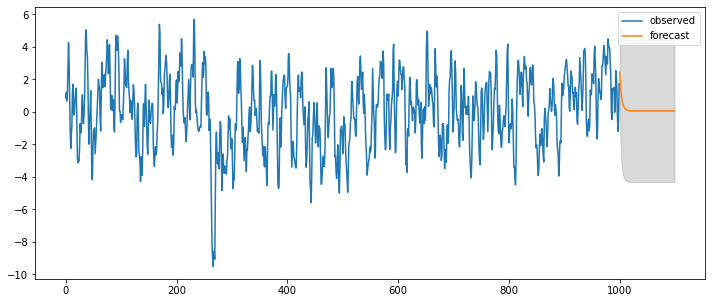

In [41]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index = forecast_index).plot(label = 'forecast', ax = ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,1], color = 'k', alpha = 0.15)
plt.legend(['observed', 'forecast'])

In [42]:
display(fit.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2783.7601
Dependent Variable: y                Log-Likelihood:      -1378.1  
Date:               2021-07-23 10:41 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           3                Sample:              0        
Df Residuals:       997                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     9.0000           HQIC:                2771.590 
AIC:                2764.1291                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         0.0641     0.1970    0.3252   0.7450   -0.3220   0.4501
ar.L1.y       0.7465     0.0224   33.3502   0.0000    0.7027   0.7904
ma.L1.y       0.6519     0.0261   24.9637   0.0000    0.6007   0.7031
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.3395             0.0000           1.3395             0.0000
MA.1          -1.5340             0.0000           1.5340             0.5000
===================================================================

"""

#### ARMA(2,2)

In [43]:
# setting
np.random.seed(123)
ar_params = np.array([0.75, -0.25])
ma_params = np.array([0.65, 0.5])
index_name = ['const', 'ar(1)' , 'ar(2)', 'ma(1)', 'ma(2)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

In [44]:
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample = 1000, burnin = 500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend = 'c', disp = 0)

C:\Users\sjyt1\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
plt.show()

plt.figure(figsize = (12, 3))
statsmodels.graphics.tsaplots.plot_acf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
statsmodels.graphics.tsaplots.plot_pacf(y, lags = 50, zero = True, use_vlines = True, alpha = 0.05, ax = plt.subplot())
plt.show()

In [45]:
pred_ts_point = fit.forecast(steps = ahead)[0]
pred_ts_interval = fit.forecast(steps = ahead)[2]

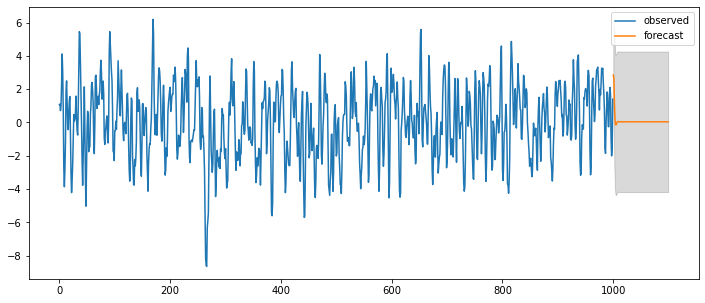

In [46]:
ax = pd.DataFrame(y).plot(figsize = (12, 5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index = forecast_index).plot(label = 'forecast', ax = ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index = forecast_index).index,
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,0],
               pd.DataFrame(pred_ts_interval, index = forecast_index).iloc[:,1], color = 'k', alpha = 0.15)
plt.legend(['observed', 'forecast'])

In [47]:
display(fit.summary2())

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2796.4977
Dependent Variable: y                Log-Likelihood:      -1377.5  
Date:               2021-07-23 10:42 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           5                Sample:              0        
Df Residuals:       995                                   0        
Converged:          1.0000           S.D. of innovations: 0.958    
No. Iterations:     12.0000          HQIC:                2778.243 
AIC:                2767.0512                                      
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        0.0415     0.1265    0.3283   0.7427   -0.2065    0.2895
ar.L1.y      0.7472     0.0597   12.5090   0.0000    0.6301    0.8643
ar.L2.y     -0.2675     0.0518   -5.1626   0.0000   -0.3691   -0.1660
ma.L1.y      0.6544     0.0553   11.8393   0.0000    0.5460    0.7627
ma.L2.y      0.5209     0.0384   13.5542   0.0000    0.4456    0.5963
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.3966            -1.3371           1.9334            -0.1215
AR.2           1.3966             1.3371           1.9334             0.1215
MA.1          -0.6281            -1.2350           1.3855            -0.3249
MA.2          -0.6281             1.2350           1.3855             0.3249
===================================================================

"""